In [2]:
import torch
import random
import numpy as np
import math
from torch import nn
from torchvision import models
from torch.utils import data
from matplotlib import pyplot as plt
from torch.nn import functional as F
from torchvision.ops import nms
%matplotlib inline

In [5]:
a = torch.tensor([3.5])
math.modf(a)

(0.5, 3.0)

In [3]:
for i in data.SubsetRandomSampler([1, 2, 3]):
    print(i, type(i))

2 <class 'int'>
3 <class 'int'>
1 <class 'int'>


In [4]:
a = torch.arange(12).reshape(3, 4)
sum(a < 2), a.tolist()

(tensor([1, 1, 0, 0]), [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])

In [5]:
class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1, 3, 1), nn.Sequential(nn.Conv2d(3, 32, 3), nn.BatchNorm2d(32), nn.LeakyReLU(0.1)))
        self.conv2 = nn.Conv2d(32, 64, 3)

In [6]:
net = Net()
net.conv1[1][0].weight

Parameter containing:
tensor([[[[-5.5986e-02,  5.7826e-02, -7.2014e-02],
          [-1.4971e-01, -7.9468e-02, -4.7622e-03],
          [-5.3897e-02, -4.8212e-02,  1.7842e-01]],

         [[ 1.8431e-01, -1.8684e-01,  1.0966e-01],
          [ 1.0049e-01,  8.5263e-02, -5.8162e-02],
          [ 1.7642e-01,  1.3422e-01, -1.7161e-01]],

         [[ 1.4593e-01, -3.4432e-02, -1.0341e-01],
          [-1.2973e-01, -1.6166e-01,  1.3450e-02],
          [-1.7897e-01,  7.8215e-02, -9.7541e-02]]],


        [[[-1.0957e-02, -1.4863e-01, -2.1922e-02],
          [ 1.0779e-01,  8.3081e-02, -7.0870e-02],
          [-3.5101e-02, -1.2047e-01, -1.1248e-01]],

         [[ 1.1704e-01, -1.8983e-01,  1.0624e-01],
          [-5.9867e-02, -6.5166e-02, -1.6745e-01],
          [ 7.9783e-02, -1.5350e-01,  3.5422e-04]],

         [[-1.2095e-01,  1.9185e-01,  5.7413e-02],
          [-4.4124e-02, -7.9650e-02,  6.3881e-02],
          [ 1.8189e-03,  1.4581e-01, -1.0464e-01]]],


        [[[ 7.6703e-02,  7.8710e-02, -3.1266

In [7]:
def initweight(m):
    classname = m.__class__.__name__
    if hasattr(m, 'weight') and classname.find('Conv') != -1:
        torch.nn.init.xavier_normal_(m.weight.data)

In [8]:
net.apply(initweight)
net.conv1[1][0].weight

Parameter containing:
tensor([[[[ 4.5276e-02,  7.8108e-02,  7.8554e-03],
          [ 9.9668e-02,  8.7599e-02, -1.5504e-02],
          [-7.7472e-02,  4.6167e-03, -1.3387e-01]],

         [[ 5.3804e-02,  1.7746e-02, -3.9718e-02],
          [-2.6359e-03,  9.4746e-02, -1.6784e-01],
          [-2.0431e-02,  6.5942e-02,  4.4418e-04]],

         [[-2.8552e-02,  1.7788e-01, -1.1739e-02],
          [ 5.2645e-02,  1.1289e-01,  7.6649e-02],
          [-1.8925e-01,  7.1552e-02,  3.4991e-03]]],


        [[[ 5.2922e-02,  4.2284e-02,  3.5086e-02],
          [ 4.4795e-02,  6.7097e-02,  2.6608e-02],
          [-3.9075e-02, -8.1488e-03,  1.0294e-01]],

         [[-1.2558e-02,  8.7534e-02,  1.2568e-01],
          [ 4.2053e-04, -2.2933e-03, -4.0280e-02],
          [ 1.0277e-01, -1.4090e-01, -3.5880e-02]],

         [[ 5.2603e-03, -2.6965e-02,  1.6284e-01],
          [ 4.9738e-03,  7.9142e-02,  5.6951e-02],
          [-9.4109e-02,  1.8115e-01, -3.2141e-03]]],


        [[[ 1.6780e-02,  3.0032e-02,  1.1968

In [9]:
x = torch.randn(1, 3, 16, 16)
net = nn.Upsample((32, 32))
net(x)

tensor([[[[-1.8609, -1.8609, -1.5190,  ..., -1.1143, -2.2045, -2.2045],
          [-1.8609, -1.8609, -1.5190,  ..., -1.1143, -2.2045, -2.2045],
          [ 0.5176,  0.5176, -1.0786,  ...,  0.3572,  0.8855,  0.8855],
          ...,
          [ 0.0850,  0.0850,  1.1325,  ..., -1.3328,  0.8391,  0.8391],
          [ 1.0894,  1.0894, -0.1064,  ..., -0.2309,  0.6993,  0.6993],
          [ 1.0894,  1.0894, -0.1064,  ..., -0.2309,  0.6993,  0.6993]],

         [[ 0.3062,  0.3062,  0.2886,  ...,  0.0795, -1.2857, -1.2857],
          [ 0.3062,  0.3062,  0.2886,  ...,  0.0795, -1.2857, -1.2857],
          [ 1.6102,  1.6102, -0.7213,  ...,  0.5915, -2.1957, -2.1957],
          ...,
          [ 1.7550,  1.7550,  0.9428,  ..., -0.9302,  0.2363,  0.2363],
          [ 1.5195,  1.5195, -1.4011,  ..., -1.7341,  0.8496,  0.8496],
          [ 1.5195,  1.5195, -1.4011,  ..., -1.7341,  0.8496,  0.8496]],

         [[ 0.0432,  0.0432, -1.0548,  ..., -1.7139,  1.0290,  1.0290],
          [ 0.0432,  0.0432, -

In [10]:
torch.tensor([3, 2], device="cuda") * 5.2
a = torch.tensor([[20, 80, 60, 120], [30, 90, 70, 130]], dtype=torch.float32)
nms(a, torch.tensor([0.5, 0.3]), 0.2), a.max(dim=1)

(tensor([0]),
 torch.return_types.max(
 values=tensor([120., 130.]),
 indices=tensor([3, 3])))

In [11]:
2 * 3 > 1

True

In [12]:
x = torch.rand(1, 3, 2, 2, 3)
y = x[..., :2].shape[0]
torch.cuda.FloatTensor(size=(1,2,3))

tensor([[[4.2039e-45, 0.0000e+00, 2.8026e-45],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]], device='cuda:0')

In [13]:
a = [(1, 2), (3, 4), (5, 6)]
b = torch.cuda.FloatTensor(a)
b.index_select(1, torch.tensor(0, device="cuda")), b[:, 0]

(tensor([[1.],
         [3.],
         [5.]], device='cuda:0'),
 tensor([1., 3., 5.], device='cuda:0'))

In [14]:
anchor_w = torch.tensor([1, 2, 3])
batch_size=2
input_height = 5
input_width = 4
shape = (2, 3, 5, 4)
anchor_w.repeat(batch_size, 1).repeat(1, 1, input_height * input_width).view(shape)

tensor([[[[1, 2, 3, 1],
          [2, 3, 1, 2],
          [3, 1, 2, 3],
          [1, 2, 3, 1],
          [2, 3, 1, 2]],

         [[3, 1, 2, 3],
          [1, 2, 3, 1],
          [2, 3, 1, 2],
          [3, 1, 2, 3],
          [1, 2, 3, 1]],

         [[2, 3, 1, 2],
          [3, 1, 2, 3],
          [1, 2, 3, 1],
          [2, 3, 1, 2],
          [3, 1, 2, 3]]],


        [[[1, 2, 3, 1],
          [2, 3, 1, 2],
          [3, 1, 2, 3],
          [1, 2, 3, 1],
          [2, 3, 1, 2]],

         [[3, 1, 2, 3],
          [1, 2, 3, 1],
          [2, 3, 1, 2],
          [3, 1, 2, 3],
          [1, 2, 3, 1]],

         [[2, 3, 1, 2],
          [3, 1, 2, 3],
          [1, 2, 3, 1],
          [2, 3, 1, 2],
          [3, 1, 2, 3]]]])

In [15]:
net = nn.Linear(20, 2, bias=False)
x = torch.rand(2, 3, 4, 2)
x, x[..., 1].shape

(tensor([[[[0.6906, 0.3069],
           [0.5878, 0.6538],
           [0.9387, 0.9723],
           [0.3610, 0.0938]],
 
          [[0.4254, 0.9890],
           [0.2812, 0.7808],
           [0.1893, 0.9601],
           [0.0901, 0.8151]],
 
          [[0.4525, 0.7731],
           [0.9461, 0.9958],
           [0.5941, 0.8004],
           [0.8484, 0.7563]]],
 
 
         [[[0.9905, 0.6600],
           [0.4459, 0.4731],
           [0.8651, 0.3370],
           [0.8331, 0.5784]],
 
          [[0.5222, 0.8960],
           [0.2054, 0.1380],
           [0.1389, 0.4665],
           [0.3593, 0.9546]],
 
          [[0.0810, 0.7926],
           [0.3375, 0.8448],
           [0.8777, 0.5119],
           [0.2634, 0.6494]]]]),
 torch.Size([2, 3, 4]))

In [16]:
x = torch.rand(3, 3, 4)
maxlen = x.size(1)
valid_len = torch.tensor([2, 3])
mask = torch.arange((maxlen), dtype=torch.float32)[None, :] < valid_len[:, None]
y = x.reshape(-1, x.shape[-1])

In [17]:
a = np.arange(5)
b = np.arange(4)
a[:, None] + b

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [18]:
np.ogrid[4:6, 4:6, 3:9, 4:6]

[array([[[[4]]],
 
 
        [[[5]]]]),
 array([[[[4]],
 
         [[5]]]]),
 array([[[[3],
          [4],
          [5],
          [6],
          [7],
          [8]]]]),
 array([[[[4, 5]]]])]

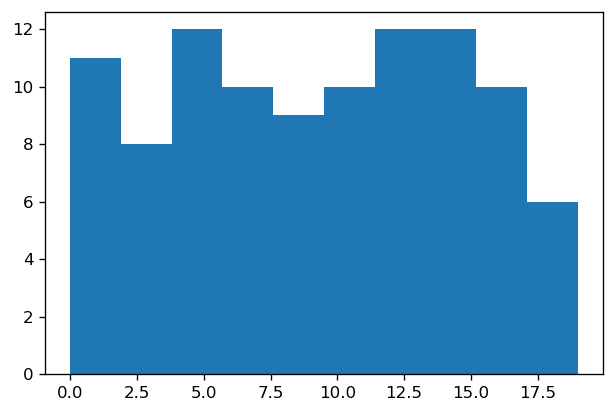

In [19]:
a = np.random.randint(20, size=100)
plt.figure(dpi=120)
plt.hist(a, bins=10)
plt.show()

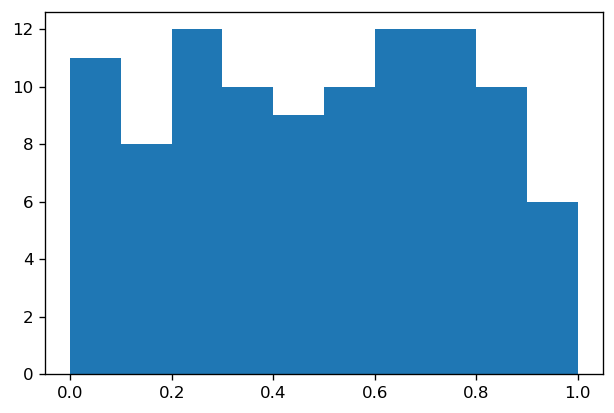

In [20]:
b = (a - np.min(a)) / (np.max(a) - np.min(a))
plt.figure(dpi=120)
plt.hist(b, bins=10)
plt.show()

In [21]:
np.round(np.mean(b), 2)

0.49

In [22]:
x = np.random.randn(3, 5)
x

array([[-0.38264224, -0.49274634,  0.07551722,  0.78283484,  1.46059668],
       [ 1.1860181 , -0.98531985, -1.03795417,  0.06062297, -0.06865533],
       [-0.54392229,  0.07641275, -0.19652705, -0.24510616, -0.52359306]])

In [23]:
y = x
x[:, 0] = 1.2
x, y

(array([[ 1.2       , -0.49274634,  0.07551722,  0.78283484,  1.46059668],
        [ 1.2       , -0.98531985, -1.03795417,  0.06062297, -0.06865533],
        [ 1.2       ,  0.07641275, -0.19652705, -0.24510616, -0.52359306]]),
 array([[ 1.2       , -0.49274634,  0.07551722,  0.78283484,  1.46059668],
        [ 1.2       , -0.98531985, -1.03795417,  0.06062297, -0.06865533],
        [ 1.2       ,  0.07641275, -0.19652705, -0.24510616, -0.52359306]]))

In [24]:
x[:, 0].sort()
x

array([[ 1.2       , -0.49274634,  0.07551722,  0.78283484,  1.46059668],
       [ 1.2       , -0.98531985, -1.03795417,  0.06062297, -0.06865533],
       [ 1.2       ,  0.07641275, -0.19652705, -0.24510616, -0.52359306]])

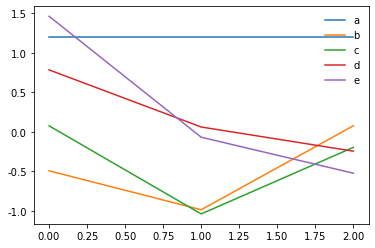

In [25]:
plt.rcParams["axes.unicode_minus"] = False
plt.figure()
plt.plot(range(3), x, label=["a", "b", "c", "d", "e"])
plt.legend(frameon=False)
plt.show()

In [37]:
a = torch.tensor(10., requires_grad=True)
b = torch.tensor(4.)
c = torch.tensor(5., requires_grad=True)
d = torch.tensor(8., requires_grad=True)
f = lambda x, y , c : x * y + c
for i in range(4):
    l = f(a, b, c) + d
    l.backward()
    # with torch.no_grad():
    #     a += a

In [38]:
a.grad, d.grad

(tensor(16.), tensor(4.))

In [2]:
input = torch.randn(5, 3, 4, 4)
target = torch.randint(3, (5, 4, 4))
F.cross_entropy(input, target, reduction="none")

tensor([[[0.5399, 0.1556, 1.6685, 2.0749],
         [0.2134, 1.5019, 0.7016, 1.1997],
         [0.7786, 1.5289, 0.6386, 1.3042],
         [3.7195, 3.2603, 0.5434, 1.1997]],

        [[0.8360, 0.2738, 1.1483, 0.4526],
         [1.8703, 2.1785, 3.0973, 0.2953],
         [2.0495, 0.2592, 0.9236, 1.2743],
         [0.9476, 2.0289, 1.9265, 0.5526]],

        [[0.0885, 0.5400, 1.7490, 1.0004],
         [1.2619, 0.5605, 0.9871, 0.5597],
         [1.8031, 1.3143, 1.7468, 2.7397],
         [0.9348, 1.8272, 0.2260, 0.5582]],

        [[0.7739, 1.5960, 2.1234, 1.3273],
         [0.7942, 0.9123, 1.9258, 2.7585],
         [2.5981, 2.7038, 0.3616, 0.2986],
         [1.0910, 2.3436, 0.7527, 1.1329]],

        [[0.2778, 1.2651, 1.4387, 2.8061],
         [1.2079, 1.2134, 3.3150, 1.2151],
         [0.7080, 2.4715, 0.4660, 1.5311],
         [0.2506, 1.4355, 1.0796, 0.7543]]])

In [3]:
# 定义 bilinear kernel
def bilinear_kernel(in_channels, out_channels, kernel_size):
    """
    return a bilinear filter tensor
    """
    factor = (kernel_size + 1) // 2
    if kernel_size % 2 == 1:
        center = factor - 1
    else:
        center = factor - 0.5
    og = np.ogrid[:kernel_size, :kernel_size]
    filt = (1 - abs(og[0] - center) / factor) * (1 - abs(og[1] - center) / factor)
    weight = np.zeros(
        (in_channels, out_channels, kernel_size, kernel_size), dtype="float32"
    )
    weight[range(in_channels), range(out_channels), :, :] = filt
    return torch.from_numpy(weight)

In [4]:
bilinear_kernel(1, 1, 4)

tensor([[[[0.0625, 0.1875, 0.1875, 0.0625],
          [0.1875, 0.5625, 0.5625, 0.1875],
          [0.1875, 0.5625, 0.5625, 0.1875],
          [0.0625, 0.1875, 0.1875, 0.0625]]]])

In [5]:
x = torch.randn(3, 4)
x, x[:, :2], x[:, None, :2], torch.max(x[:, None, :2], x[:, :2])
torch.argmax(x)

tensor(6)

In [6]:
x = torch.arange(20).reshape(2, 5, 2)
x.sum(dim=2)
torch.zeros(20, dtype=torch.long)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
def conv_trans(input, kernel):
    h, w = kernel.shape
    Y = torch.zeros(input.shape[0] + h - 1, input.shape[1] + w - 1)
    for i in range(input.shape[0]):
        for j in range(input.shape[1]):
            Y[i : i + h, j : j + w] += kernel * input[i, j]
    return Y

In [8]:
input = torch.arange(16).reshape(4, 4)
kernel = torch.randn(3, 3)
conv_trans(input, kernel)

tensor([[  0.0000,  -0.7475,  -1.5456,  -2.4634,  -0.3913,  -0.3590],
        [ -2.9900,  -5.7411,  -9.9993, -15.6584,  -8.1336,  -6.1172],
        [-13.1840, -22.9570, -36.6328, -45.3979, -22.3950, -17.2545],
        [-31.7679, -45.6735, -71.6931, -80.4582, -38.8714, -29.5984],
        [-38.3919, -54.8722, -90.5229, -98.3702, -52.2316, -39.6686],
        [-25.1699, -24.8917, -41.2687, -44.3746, -13.9208, -18.0968]])

In [9]:
def sythentic_data(w, b, num):
    x = torch.normal(0, 2, size=(num, len(w)))
    y = x @ w + b + torch.randn(num)
    return x, y

In [10]:
def load_data(x, y, batch_size):
    n = len(x)
    indices = list(range(n))
    random.shuffle(indices)
    for i in range(0, n, batch_size):
        id = indices[i:min(i + batch_size, n)]
        yield x[id], y[id]

In [11]:
def mseloss(x, y, w, b):
    h = x @ w + b
    return torch.sum(torch.pow(h - y, 2)) / (2 * len(x))

In [12]:
def gradientDescent(*params, lr):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad
            param.grad.zero_()

In [13]:
true_w = torch.tensor([2, 1.5])
true_b = torch.tensor(3)
num = 256
batch_size =20
X, Y = sythentic_data(true_w, true_b, num)
w = torch.randn(2, requires_grad=True)
b = torch.zeros(1, requires_grad=True, dtype=torch.float)
epoch = 40
lr = 0.01
feature, label = next(load_data(X, Y, batch_size))
mseloss(feature, label, w, b)

tensor(41.4106, grad_fn=<DivBackward0>)

In [14]:
for _ in range(epoch):
    for f, l in load_data(X, Y, batch_size):
        mseloss(f, l, w, b).backward()
        gradientDescent(w, b, lr=lr)

In [16]:
w = w - w.grad
id(w), id(w.grad)

TypeError: unsupported operand type(s) for -: 'Tensor' and 'NoneType'

In [16]:
w -= w.grad # requires_grad=True不能执行替换操作，因为张量保存的梯度与张量值有关，所以pytorch会报错
# w.grad.zero_()
type(w)

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [ ]:
x1 = torch.arange(6.).reshape(2, 3)
x2 = torch.arange(6., 12., requires_grad=True).reshape(2, 3)
y = x1 * x2
y.backward(gradient=torch.ones(y.shape))
x1, x2, torch.stack([x1, x2], dim=0)

In [ ]:
net = nn.Sequential(nn.Conv2d(6, 16, 5, 5), nn.Linear(16 * 5 * 5, 20)) # 矩阵形状为16*6*5*5
net.state_dict()

In [ ]:
X = np.random.randint(1, 4, (2, 3, 2, 2))                                                                                                                
X, X.mean(axis=(0, 2, 3), keepdims=True), X.mean(axis=1)

In [ ]:
def batch_norm(x, gamma, beta, e):
    var = x.var(dim=(0, 2, 3), keepdim=True)
    x_hat = (x - x.mean(dim=(0, 2, 3), keepdim=True)) / (var + e)
    y = gamma * x_hat + beta
    return y

In [ ]:
a = torch.rand(4, 2, 3, 2)
gamma = torch.ones(a.shape)
beta = torch.zeros(a.shape)
e = 0.001
batch_norm(a, gamma, beta, e)

In [ ]:
a = torch.arange(15).reshape(5, 3)
b = torch.arange(3).reshape(1, 3)
a + b

In [ ]:
prenet = models.vgg19()
prenet.features

In [ ]:
a = torch.randint(1, 4, (2, 3, 2, 2))
b = torch.randint(5, 8, (2, 3, 2, 2))
torch.cat([a, b], dim=1)

In [ ]:
c = torch.rand(3, 3) 
d = torch.rand(3, 3)
c[:, 0], torch.stack((c[:, 0], c[:, 1], d[:, 0], d[:, 1]), dim=0)

In [ ]:
b = torch.arange(4).reshape(2, 2)
torch.repeat_interleave(b, 2, dim=0)

In [ ]:
# @save
def multibox_prior(data, sizes, ratios):
    """生成以每个像素为中心具有不同形状的锚框。"""
    in_height, in_width = data.shape[-2:]
    device, num_sizes, num_ratios = data.device, len(sizes), len(ratios)
    boxes_per_pixel = num_sizes + num_ratios - 1
    size_tensor = torch.tensor(sizes, device=device)
    ratio_tensor = torch.tensor(ratios, device=device)

    # 为了将锚点移动到像素的中心，需要设置偏移量。
    # 因为一个像素的的高为1且宽为1，我们选择偏移我们的中心0.5
    offset_h, offset_w = 0.5, 0.5
    steps_h = 1.0 / in_height  # Scaled steps in y axis
    steps_w = 1.0 / in_width  # Scaled steps in x axis

    # 生成锚框的所有中心点
    center_h = (torch.arange(in_height, device=device) + offset_h) * steps_h
    center_w = (torch.arange(in_width, device=device) + offset_w) * steps_w
    shift_y, shift_x = torch.meshgrid(center_h, center_w)
    shift_y, shift_x = shift_y.reshape(-1), shift_x.reshape(-1)

    # 生成“boxes_per_pixel”个高和宽，
    # 之后用于创建锚框的四角坐标 (xmin, xmax, ymin, ymax)
    w = (
        torch.cat(
            (
                size_tensor * torch.sqrt(ratio_tensor[0]),
                sizes[0] * torch.sqrt(ratio_tensor[1:]),
            )
        )
        * in_height
        / in_width
    )  # Handle rectangular inputs
    h = torch.cat(
        (
            size_tensor / torch.sqrt(ratio_tensor[0]),
            sizes[0] / torch.sqrt(ratio_tensor[1:]),
        )
    )
    # 除以2来获得半高和半宽
    anchor_manipulations = (
        torch.stack((-w, -h, w, h)).T.repeat(in_height * in_width, 1) / 2
    )

    # 每个中心点都将有“boxes_per_pixel”个锚框，
    # 所以生成含所有锚框中心的网格，重复了“boxes_per_pixel”次
    out_grid = torch.stack(
        [shift_x, shift_y, shift_x, shift_y], dim=1
    ).repeat_interleave(boxes_per_pixel, dim=0)
    output = out_grid + anchor_manipulations
    return output.unsqueeze(0)


In [ ]:
img = plt.imread(r'D:\WorkSpace\PythonProject\pytorch\img\catdog.jpg')
h, w = img.shape[:2]

print(h, w)
X = torch.rand(size=(2, 3, h, w))
Y = multibox_prior(X, sizes=[0.75, 0.5, 0.25], ratios=[1, 2, 0.5])
Y.shape